In [1]:
import pandas as pd
import numpy as np

In [36]:
np.random.seed(7777)

In [3]:
ids = pd.read_csv("ids.csv")
ids

,id
0,524354
1,61537
2,1142564
3,300432
4,83777
...,...
95,912470
96,1526265
97,52803
98,373737


In [2]:
edges = pd.read_csv("edges.csv")
edges

,id_1,id_2,value,n_transactions
0,878327,1133997,478035.238733,277.747437
1,707356,1341541,442189.669684,80.997950
2,169982,494074,353097.929209,287.789650
3,551010,979933,537749.674840,426.743337
4,76064,597023,418990.198382,287.789650
...,...,...,...,...
4685639,533291,1134794,275822.479741,1.000000
4685640,929970,1378868,507684.088750,1.000000
4685641,45803,829031,318785.728608,1.000000
4685642,1266550,1448478,494106.825312,1.000000


In [4]:
vertices = pd.read_csv("vertices.csv")
vertices

,id,main_okved,region_code,company_type
0,1,46.75,77,Limited
1,2,41.20,78,Limited
2,3,25.11,50,Limited
3,4,45.31,89,Limited
4,5,56.10,50,Limited
...,...,...,...,...
1534744,1534745,63.99,77,Individual
1534745,1534746,47.19,66,Individual
1534746,1534747,41.20,77,Individual
1534747,1534748,74.20,33,Individual


In [5]:
edges[edges.id_1.isin(ids.id) | edges.id_2.isin(ids.id)][["id_1", "id_2"]]

,id_1,id_2
108,524354,958357
194,80484,319548
309,776150,786322
312,524354,1096103
342,776150,1300786
...,...,...
4685417,263624,567406
4685449,41216,328439
4685479,41216,635885
4685507,410574,1523148


In [6]:
(edges["id_1"] > edges["id_2"]).any()

False

In [7]:
vertices.index

RangeIndex(start=0, stop=1534749, step=1)

In [8]:
from matplotlib import pyplot as plt

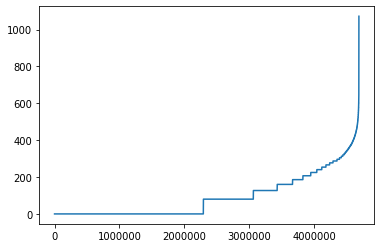

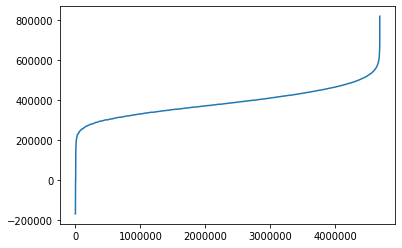

([<matplotlib.lines.Line2D at 0x7efbd198f250>], None)

In [9]:
def gendist(df, col):
    return df[col].sort_values().reset_index()[col]
plt.plot(gendist(edges, "n_transactions")), plt.show()
plt.plot(gendist(edges, "value")), plt.show()

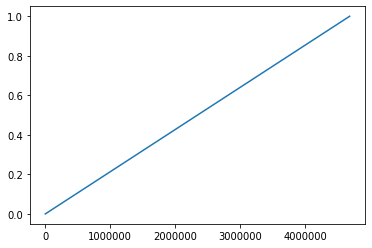

In [10]:
def normalize(df, col, by="value"):
    dist = df.sort_values(by=[col, by])[col].reset_index()
    return (dist["index"].rename(col) + 1) / len(df)
plt.plot(normalize(edges, "n_transactions").sort_values().reset_index()["n_transactions"])

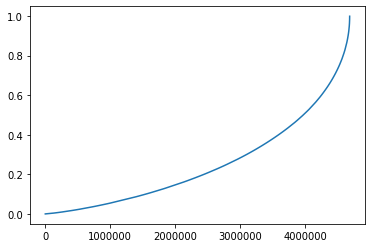

In [11]:
plt.plot((normalize(edges, "value") * normalize(edges, "n_transactions")).sort_values().reset_index()[0])

In [44]:
edges_weight = 4
iters = 4

def train_data(iters=iters):
    xs = []
    ys = []
    ws = []
    xs.append(edges[["id_1", "id_2"]])
    ys.append(pd.Series(np.ones(len(edges)), name="y"))
    ws.append(normalize(edges, "value") * normalize(edges, "n_transactions") * edges_weight + 1)
    for i in range(iters):
        other = pd.Series(np.random.randint(1, len(vertices) + 1, size=len(vertices))).rename("id_2")
        train_edges = pd.concat([vertices.id.rename("id_1"), other], axis=1)
        train_edges.values.sort()
        xs.append(train_edges)
        ys.append(pd.Series(np.zeros(len(vertices)), name="y"))
        ws.append(pd.Series(np.ones(len(vertices)), name="w"))
    concat = lambda its: pd.concat(its).reset_index().drop(columns="index")
    return concat(xs), concat(ys), concat(ws)
xΔ, y, w = train_data()
xΔ, y, w

(             id_1     id_2
 0          878327  1133997
 1          707356  1341541
 2          169982   494074
 3          551010   979933
 4           76064   597023
 ...           ...      ...
 10824635    29816  1534745
 10824636   929410  1534746
 10824637  1020125  1534747
 10824638   866882  1534748
 10824639   497129  1534749
 
 [10824640 rows x 2 columns],             y
 0         1.0
 1         1.0
 2         1.0
 3         1.0
 4         1.0
 ...       ...
 10824635  0.0
 10824636  0.0
 10824637  0.0
 10824638  0.0
 10824639  0.0
 
 [10824640 rows x 1 columns],                  0
 0         1.000130
 1         1.000156
 2         1.000216
 3         1.000482
 4         1.000955
 ...            ...
 10824635  1.000000
 10824636  1.000000
 10824637  1.000000
 10824638  1.000000
 10824639  1.000000
 
 [10824640 rows x 1 columns])

In [45]:
def preprocess_data(edges):
    verts = vertices.copy()
    verts["main_okved"] = verts["main_okved"].astype("str").str.replace('.', '').astype("int")
    x1 = edges.merge(verts, left_on="id_1", right_on="id")
    x2 = x1.merge(verts, left_on="id_2", right_on="id", suffixes=("_1", "_2")).drop(["id_1", "id_2"], axis=1)
    return x2
x = preprocess_data(xΔ)
x

,main_okved_1,region_code_1,company_type_1,main_okved_2,region_code_2,company_type_2
0,682,23,Individual,4759,23,Individual
1,4399,59,Individual,4759,23,Individual
2,469,23,Limited,4759,23,Individual
3,4643,23,Limited,4759,23,Individual
4,7711,78,Individual,4759,23,Individual
...,...,...,...,...,...,...
10824635,9001,74,NonComm,8122,66,Individual
10824636,869,23,Limited,9602,23,Individual
10824637,4932,72,Individual,452,50,Limited
10824638,4932,66,Individual,7022,55,Individual
